# Lab 4: Functions and Visualizations

This week, we'll learn about functions, table methods such as `apply`, and how to generate visualizations! 

Recommended Reading:

* [Applying a Function to a Column](https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html)
* [Visualizations](https://inferentialthinking.com/chapters/07/Visualization.html)

First, set up the notebook by running the cell below.

In [1]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Defining functions

Let's write a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(.5)` should be the number 50 (no percent sign).

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.  Like other names we've defined, it can't start with a number or contain spaces. Let's call our function `to_percentage`:
    
    def to_percentage

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  A function can have any number of arguments (including 0!). 

`to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

    def to_percentage(proportion)
    
If we want our function to take more than one argument, we add a comma between each argument name. Note that if we had zero arguments, we'd still place the parentheses () after than name. 

We put a colon after the signature to tell Python it's over. If you're getting a syntax error after defining a function, check to make sure you remembered the colon!

    def to_percentage(proportion):

##### Documentation
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing an **indented** triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function and every line **must be indented with a tab**.  Any lines that are *not* indented and left-aligned with the def statement is considered outside the function. 

Some notes about the body of the function:
- We can write code that we would write anywhere else.  
- We use the arguments defined in the function signature. We can do this because we assume that when we call the function, values are already assigned to those arguments.
- We generally avoid referencing variables defined *outside* the function. If you would like to reference variables outside of the function, pass them through as arguments!


Now, let's give a name to the number we multiply a proportion by to get a percentage:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### `return`
The special instruction `return` is part of the function's body and tells Python to make the value of the function call equal to whatever comes right after `return`.  We want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor
        
`return` only makes sense in the context of a function, and **can never be used outside of a function**. `return` is always the last line of the function because Python stops executing the body of a function once it hits a `return` statement.

*Note:*  `return` inside a function tells Python what value the function evaluates to. However, there are other functions, like `print`, that have no `return` value. For example, `print` simply prints a certain value out to the console. 

`return` and `print` are **very** different. 

**Question 1.1.** Define `to_percentage` in the cell below.  Call your function to convert the proportion .6 to a percentage.  Name that percentage `sixty_percent`.

<!--
BEGIN QUESTION
name: q11
-->

In [4]:
def to_percentage(proportion):
    '''Converts a proportion to a percentage.'''
    factor = 100
    return proportion * factor

sixty_percent = to_percentage(.6)
sixty_percent

60.0

Like you’ve done with built-in functions in previous labs (max, abs, etc.), you can pass in named values as arguments to your function.

**Question 1.2.** Use `to_percentage` again to convert the proportion named `a_proportion` (defined below) to a percentage called `a_percentage`.

*Note:* You don't need to define `to_percentage` again!  Like other named values, functions stick around after you define them.

<!--
BEGIN QUESTION
name: q12
-->

In [7]:
a_proportion = 2**(.5) / 2
a_percentage = to_percentage(a_proportion)
a_percentage

70.71067811865476

Here's something important about functions: the names assigned *within* a function body are only accessible within the function body. Once the function has returned, those names are gone.  So even if you created a variable called `factor` and defined `factor = 100` inside of the body of the `to_percentage` function and then called `to_percentage`, `factor` would not have a value assigned to it outside of the body of `to_percentage`:

In [8]:
# You should see an error when you run this.  (If you don't, you might
# have defined factor somewhere above.)
factor

NameError: name 'factor' is not defined

As we've seen with built-in functions, functions can also take strings (or arrays, or tables) as arguments, and they can return those things, too.

**Question 1.3.** Define a function called `disemvowel`.  It should take a single string as its argument.  (You can call that argument whatever you want.)  It should return a copy of that string, but with all the characters that are vowels removed.  (In English, the vowels are the characters "a", "e", "i", "o", and "u".) You can use as many lines inside of the function to do this as you’d like.

*Hint:* To remove all the "a"s from a string, you can use `that_string.replace("a", "")`.  The `.replace` method for strings returns a new string, so you can call `replace` multiple times, one after the other. 

<!--
BEGIN QUESTION
name: q13
-->

In [19]:
def disemvowel(a_string):
    '''Remove all vowels from a word.'''
    for elem in a_string:
        if elem == "a" or "e" or "i" or "o" or "u":
            new_string = a_string.replace("a", "").replace("e", "").replace("i", "").replace("o", "").replace("u", "")
    return new_string
            


# An example call to your function.  (It's often helpful to run
# an example call from time to time while you're writing a function,
# to see how it currently works.)
disemvowel("Can you read this without vowels?")

'Cn y rd ths wtht vwls?'

##### Calls on calls on calls
Just as you write a series of lines to build up a complex computation, it's useful to define a series of small functions that build on each other.  Since you can write any code inside a function's body, you can call other functions you've written.

If a function is a like a recipe, defining a function in terms of other functions is like having a recipe for cake telling you to follow another recipe to make the frosting, and another to make the jam filling.  This makes the cake recipe shorter and clearer, and it avoids having a bunch of duplicated frosting recipes.  It's a foundation of productive programming.

For example, suppose you want to count the number of characters *that aren't vowels* in a piece of text.  One way to do that is this to remove all the vowels and count the size of the remaining string.

**Question 1.4.** Write a function called `num_non_vowels`.  It should take a string as its argument and return a number.  That number should be the number of characters in the argument string that aren't vowels. You should use the `disemvowel` function you wrote above inside of the `num_non_vowels` function.

*Hint:* The function `len` takes a string as its argument and returns the number of characters in it.

<!--
BEGIN QUESTION
name: q14
-->

In [24]:
def num_non_vowels(a_string):
    """The number of characters in a string, minus the vowels."""
    return len(disemvowel(a_string))

num_non_vowels("Can you read this without vowels?")



# Try calling your function yourself to make sure the output is what you expect.

4

Functions can also encapsulate code that *displays output* instead of computing a value. For example, if you call `print` inside a function, and then call that function, something will get printed.

The `Bachelors` dataset contains information from 2019 on the number of people from the United States with bachelor's degrees in various fields of study broken down by age group, sex, and state. The original source of the data is the US Census Bureau, but this dataset was found on [Kaggle.com](https://www.kaggle.com/tjkyner/bachelor-degree-majors-by-age-sex-and-state). Suppose you'd like to display the state with the 3rd-highest number of bachelor's degrees for females 25 and older, and that state's number of females with bachelor's degrees, printed in a human-readable way. You might do this:

In [25]:
Bachelors = Table.read_table("Bachelors.csv")
rank = 3

bach_state_25_older_f_sorted = Bachelors.where(
    'Age Group', '25 and older').where(
    'Sex', 'Female').sort(
    "Bachelor's Degree Holders", descending=True)

state_rank_3 = bach_state_25_older_f_sorted.column('State').item(rank-1)
num_bach_rank_3 = bach_state_25_older_f_sorted.column("Bachelor's Degree Holders").item(rank-1)

print(state_rank_3, 
      "has a rank of", 
      rank, 
      "among the states with the highest number of bachelor's degrees for females 25 years and older with",
      num_bach_rank_3,
      "people with bachelor's degrees"
     )


New York has a rank of 3 among the states with the highest number of bachelor's degrees for females 25 years and older with 2791891 people with bachelor's degrees


After writing this, you realize you also wanted to print out the states and their number of people with bachelor's degrees for the 1st and 2nd-highest states as well.  Instead of copying your code, you decide to put it in a function.  Since the rank varies, you make that an argument to your function.

**Question 1.5.** Write a function called `print_kth_top_bach_f_state`.  It should take a single argument, the rank of the state (like 1, 2, or 3 in the above examples).  It should print out a message like the one above.  

*Note:* Your function shouldn't have a `return` statement.

<!--
BEGIN QUESTION
name: q15
-->

In [27]:
def print_kth_top_bach_f_state(k):
    '''print out the states and their number of people with bachelor's degrees for the 1st and 2nd-highest states'''
    bach_state_25_older_f_sorted = Bachelors.where( 'Age Group', '25 and older').where('Sex', 'Female').sort("Bachelor's Degree Holders", descending=True)

    K_1 = bach_state_25_older_f_sorted.column("State").item(k-1)
    num_female_bachelor_over_25 = bach_state_25_older_f_sorted.column("Bachelor's Degree Holders").item(k-1)
    
    print(K_1, "has a rank of", k, "among the states with the highest number of bachelor's degrees for females 25 years and older with", num_female_bachelor_over_25, "people with bachelor's degrees")


# Example calls to your function:
print_kth_top_bach_f_state(1)
print()
print_kth_top_bach_f_state(2)

California has a rank of 1 among the states with the highest number of bachelor's degrees for females 25 years and older with 4868520 people with bachelor's degrees

Texas has a rank of 2 among the states with the highest number of bachelor's degrees for females 25 years and older with 2991987 people with bachelor's degrees


### `print` is not the same as `return`
The `print_kth_top_bach_state` function prints the state and the total number of people with bachelor's degrees for the rank that was provided. However, since we did not return any value in this function, we can not use it after we call it. Let's look at an example of another function that prints a value but does not return it.

In [28]:
def print_number_five():
    print(5)

In [29]:
print_number_five()

5


However, if we try to use the output of `print_number_five()`, we see that the value `5` is printed but we get a TypeError when we try to add the number 2 to it!

In [30]:
print_number_five_output = print_number_five()
print_number_five_output + 2

5


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

It may seem that `print_number_five()` is returning a value, 5. In reality, it just displays the number 5 to you without giving you the actual value! If your function prints out a value without returning it and you try to use that value, you will run into errors, so be careful!

Explain to your neighbor how you might add a line of code to the `print_number_five` function (after `print(5)`) so that the code `print_number_five_output + 5` would result in the value `10`, rather than an error.

## 2. Functions and Vice Chancellor Incomes

In this question, we'll look at the `vc_compensation` dataset, containing the 2021 compensation for those with 'Vice Chancellor' in their primary working title across North Carolina public universities. This data, and much else about state employees, is publicly available. 

In [31]:
vc_compensation = Table.read_table('vc_compensation.csv')
vc_compensation

INSTITUTION NAME,LAST NAME,FIRST NAME,JOB CATEGORY,EMPLOYEE ANNUAL BASE SALARY,EMPLOYEE HOME DEPARTMENT,PRIMARY WORKING TITLE
NCCU,Abegunrin,Abiodun,Chief Facilities Officer,$160000,Building Maintenace,Associate Vice Chancellor Facilities Management (Time-Li ...
WSSU,Afolayan,LaTanya,Chief Development / Advancement Officer,$145000,University Advancement,Vice Chancellor for University Advancement
UNC-CH,Agostini,Stephen,Chief Financial Services Officer,$315000,AVC Finance and Budget,Associate Vice Chancellor
UNCG,Akens,Catherine,Chief Student Affairs Officer,$210000,Student Affairs,Vice Chancellor
NCCU,Anderson,Yolanda,Professor,$148546,Office of Academic Affairs,Associate Vice Chancellor Academic Affairs
NCSU,Arden,Warwick,Executive Vice Chancellor,$454555,Exec Vice Chancellor & Provost,Exec Vice Chancellor & Provost
UNCC,Bailey,Kevin,Chief Student Affairs Officer,$225000,Student Affairs VC,Vice Chancellor Student Affair
UNC-CH,BARKER,JAMES,Chief Information / IT Officer,$325000,ITS - VC - CIO,Vice Chancellor
UNC-CH,Battle,George,Vice Chancellor,$327191,VC Instit Integ and Rsk Mgmt,Vice Chancellor
NCSU,Bhada,Carrie,Assoc/Asst Vice Chancellor,$196000,University Development,Asst Vice Chancellor


We want to compute the average of the Vice Chancellors' pay. Try running the cell below.

In [57]:
np.average(vc_compensation.column("EMPLOYEE ANNUAL BASE SALARY"))

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> None

You should see a TypeError. Let's examine why this error occurred by looking at the values in the `EMPLOYEE ANNUAL BASE SALARY` column. 

**Question 2.1.** Use the `type` function and set `base_salary_type` to the type of the first value in the `EMPLOYEE ANNUAL BASE SALARY` column.

<!--
BEGIN QUESTION
name: q21
-->

In [44]:
base_salary_type = type(vc_compensation.column("EMPLOYEE ANNUAL BASE SALARY").item(0))
base_salary_type

str

**Question 2.2.** You should have found that the values in the `EMPLOYEE ANNUAL BASE SALARY` column are strings. It doesn't make sense to take the average of string values, so we need to convert them to numbers if we want to do this. Extract the first value in `EMPLOYEE ANNUAL BASE SALARY`. This is the salary for NCCU's Associate Vice Chancellor for Facilities Management.

<!--
BEGIN QUESTION
name: q22
-->

In [45]:
NCCU_vc_string = vc_compensation.column("EMPLOYEE ANNUAL BASE SALARY").item(0)
NCCU_vc_string

'$160000 '

**Question 2.3.** Convert `NCCU_vc_string` to a number of *dollars*. 

Some hints, as this question requires multiple steps:
- The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `"100%".strip("%")` is the string `"100"`.  
- You'll also need the function `float`, which converts a string that looks like a number to an actual number.  

<!--
BEGIN QUESTION
name: q23
-->

In [63]:
NCCU_vc_pay = float(NCCU_vc_string.strip("$"))
NCCU_vc_pay

160000.0

To compute the average pay, we need to do this for every Vice Chancellor. But that looks like it would involve copying this code 157 times.

This is where functions come in.  First, we'll define a new function, giving a name to the expression that converts "EMPLOYEE ANNUAL BASE SALARY" strings to numeric values.  Later in this lab, we'll see the payoff: we can call that function on every salary string in the dataset at once.

The next section of this lab explains how to define a function. For now, just fill in the ellipses in the cell below.

**Question 2.4.** Copy the expression you used to compute `NCCU_vc_pay`, and use it as the return expression of the function below. But make sure you replace the specific `NCCU_vc_string` with the generic `base_salary_string` name specified in the first line in the `def` statement.

*Hint*: When dealing with functions, you should generally not be referencing any variable outside of the function. Usually, you want to be working with the arguments that are passed into it, such as `base_salary_string` for this function. If you're using `NCCU_vc_pay` within your function, you're referencing an outside variable!

<!--
BEGIN QUESTION
name: q24
-->

In [74]:
def convert_base_salary_string_to_number(base_salary_string):
    """Converts a base salary string like '$100000' to a number of dollars."""
    return float(base_salary_string.strip("$"))


Running that cell doesn't convert any particular base salary string. Instead, it creates a function called `convert_base_salary_string_to_number` that can convert *any* string with the right format to a number representing dollars.

We can call our function just like we call the built-in functions we've seen. It takes one argument -- a string -- and it returns a float.

In [75]:
convert_base_salary_string_to_number('$42')

42.0

In [76]:
convert_base_salary_string_to_number(NCCU_vc_string)

160000.0

In [77]:
# We can also compute UNC-CH's Chief Information / IT Officer in the same way:
convert_base_salary_string_to_number(vc_compensation.where(
    "INSTITUTION NAME", 'UNC-CH').where(
    'JOB CATEGORY', 'Chief Information / IT Officer').column(
    "EMPLOYEE ANNUAL BASE SALARY").item(0))

325000.0

So, what have we gained by defining the `convert_base_salary_string_to_number` function? 
Well, without it, we'd have to copy the code `float(some_pay_string.strip("$"))` each time we wanted to convert a pay string. Now we just call a function whose name says exactly what it's doing.

## 3. `apply`ing functions

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the text "data"!

For example, we can make a new name for the built-in function `max` if we want:

In [78]:
our_name_for_max = max
our_name_for_max(2, 6)

6

The old name for `max` is still around:

In [79]:
max(2, 6)

6

Try just writing `max` or `our_name_for_max` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [80]:
max

<function max>

Now try writing `?max` or `?our_name_for_max` (or the name of any other function) in a cell, and run that cell.  An information box should show up at the bottom of your screen a longer description of the function

*Note: You can also press Shift+Tab after clicking on a name to see similar information!*

In [81]:
?our_name_for_max

Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method

Let's look at what happens when we set `max`to a non-function value. You'll notice that a TypeError will occur when you try calling `max`. Things like integers and strings are not callable. Look out for any functions that might have been renamed when you encounter this type of error

In [82]:
max = 6
max(2, 6)

TypeError: 'int' object is not callable

In [83]:
# This cell resets max to the built-in function. Just run this cell, don't change its contents
import builtins
max = builtins.max

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an array of functions.

In [84]:
make_array(max, np.average, are.equal_to)

array([<built-in function max>, <function average at 0x10505cab0>,
       <function are.equal_to at 0x1598d4ea0>], dtype=object)

**Question 3.1.** Make an array containing any 3 other functions you've seen.  Call it `some_functions`.

<!--
BEGIN QUESTION
name: q31
-->

In [85]:
some_functions = make_array(max, np.abs, are.below)
some_functions

array([<built-in function max>, <ufunc 'absolute'>,
       <function are.below at 0x1598d4fe0>], dtype=object)

Working with functions as values can lead to some funny-looking code. For example, see if you can figure out why the following code works.

In [86]:
make_array(max, np.average, are.equal_to).item(0)(4, -2, 7)

7

A more useful example of passing functions to other functions as arguments is the table method `apply`.

`apply` calls a function many times, once on *each* element in a column of a table.  It produces an *array* of the results.  Here we use `apply` to convert every Vice Chancellor's pay to a number, using the function you defined:

In [87]:
vc_compensation.apply(convert_base_salary_string_to_number, "EMPLOYEE ANNUAL BASE SALARY")

array([ 160000.,  145000.,  315000.,  210000.,  148546.,  454555.,
        225000.,  325000.,  327191.,  196000.,  194655.,  195000.,
        172507.,  165000.,  221740.,  293619.,  240952.,  141000.,
        180000.,  247500.,  131790.,  137678.,  125000.,  103000.,
        175613.,  280000.,  110841.,  140000.,  179008.,  116000.,
        151652.,  240720.,  290340.,  126000.,  165000.,  135000.,
        124000.,  265000.,  254142.,  200000.,  110000.,  159324.,
        117250.,  165000.,  210000.,  130000.,  150000.,  185000.,
        223063.,  205000.,  108728.,  143000.,  200000.,  245000.,
        143434.,  209039.,  324133.,  192876.,  327000.,  196650.,
        220000.,  189983.,  300000.,  310000.,  117500.,  180000.,
        225000.,  190000.,  255755.,  370000.,  200000.,  150000.,
        102000.,  155000.,  342971.,  190000.,  169500.,  105000.,
        345000.,  201093.,  400000.,  120000.,  200717.,  185000.,
        150000.,  151000.,  310500.,  150000.,  126131.,  2189

Note that we didn’t write `vc_compensation.apply(convert_base_salary_string_to_number(), “EMPLOYEE ANNUAL BASE SALARY”)` or `vc_compensation.apply(convert_base_salary_string_to_number(“EMPLOYEE ANNUAL BASE SALARY”))`. We just passed the name of the function, with no parentheses, to `apply`, because all we want to do is let `apply` know the name of the function we’d like to use and the name of the column we’d like to use it on. `apply` will then call the function `convert_base_salary_string_to_number` on each value in the column for us!

**Question 3.2.** Using `apply`, make a table that's a copy of `vc_compensation` with one additional column called `Base Salary ($)`.  That column should contain the result of applying `convert_base_salary_string_to_number` to the `EMPLOYEE ANNUAL BASE SALARY` column (as we did above).  Call the new table `compensation`.

<!--
BEGIN QUESTION
name: q32
-->

In [88]:
compensation = vc_compensation.with_column(
    "Base Salary ($)", vc_compensation.apply(convert_base_salary_string_to_number, "EMPLOYEE ANNUAL BASE SALARY"))
compensation

INSTITUTION NAME,LAST NAME,FIRST NAME,JOB CATEGORY,EMPLOYEE ANNUAL BASE SALARY,EMPLOYEE HOME DEPARTMENT,PRIMARY WORKING TITLE,Base Salary ($)
NCCU,Abegunrin,Abiodun,Chief Facilities Officer,$160000,Building Maintenace,Associate Vice Chancellor Facilities Management (Time-Li ...,160000
WSSU,Afolayan,LaTanya,Chief Development / Advancement Officer,$145000,University Advancement,Vice Chancellor for University Advancement,145000
UNC-CH,Agostini,Stephen,Chief Financial Services Officer,$315000,AVC Finance and Budget,Associate Vice Chancellor,315000
UNCG,Akens,Catherine,Chief Student Affairs Officer,$210000,Student Affairs,Vice Chancellor,210000
NCCU,Anderson,Yolanda,Professor,$148546,Office of Academic Affairs,Associate Vice Chancellor Academic Affairs,148546
NCSU,Arden,Warwick,Executive Vice Chancellor,$454555,Exec Vice Chancellor & Provost,Exec Vice Chancellor & Provost,454555
UNCC,Bailey,Kevin,Chief Student Affairs Officer,$225000,Student Affairs VC,Vice Chancellor Student Affair,225000
UNC-CH,BARKER,JAMES,Chief Information / IT Officer,$325000,ITS - VC - CIO,Vice Chancellor,325000
UNC-CH,Battle,George,Vice Chancellor,$327191,VC Instit Integ and Rsk Mgmt,Vice Chancellor,327191
NCSU,Bhada,Carrie,Assoc/Asst Vice Chancellor,$196000,University Development,Asst Vice Chancellor,196000


Now that we have all the pays as numbers, we can learn more about them through computation.

**Question 3.3.** Compute the average base salary of the Vice Chancellors in the dataset (assume that everyone in the data is a Vice Chancellor).

<!--
BEGIN QUESTION
name: q33
-->

In [90]:
average_base_salary = np.average(compensation.column("Base Salary ($)"))
average_base_salary

199322.82165605095

**Why is `apply` useful?**

For operations like arithmetic, or the functions in the NumPy library, you don't need to use `apply`, because they automatically work on each element of an array.  But there are many things that don't.  The string manipulation we did in today's lab is one example.  Since you can write any code you want in a function, `apply` gives you total control over how you operate on data.

## 4. Histograms
Earlier, we computed the average pay among the 157 Vice Chancellors in our dataset.  The average doesn't tell us everything about the amounts Vice Chancellors are paid, though.  Maybe just a few Vice Chancellors make the bulk of the money.

We can use a *histogram* method to display the *distribution* of a set of numbers.  The table method `hist` takes a single argument, the name of a column of numbers.  It produces a histogram of the numbers in that column.

**Question 4.1.** Make a histogram of the base salary of the Vice Chancellors in `compensation`. Check with your neighbor or a staff member to make sure you have the right plot. Construct the bins of your histogram to begin at \\$50,000 and have bin widths of \\$50,000.

*Note:* When you answer this question, you may encounter a red box appearing below your code cell that says something like `FixedFormatter should only be used together with FixedLocator`. Don't worry too much about the message. Warnings are raised by Python when it encounters an unusual condition in your code, but the condition is not severe enough to warrant throwing an error. 

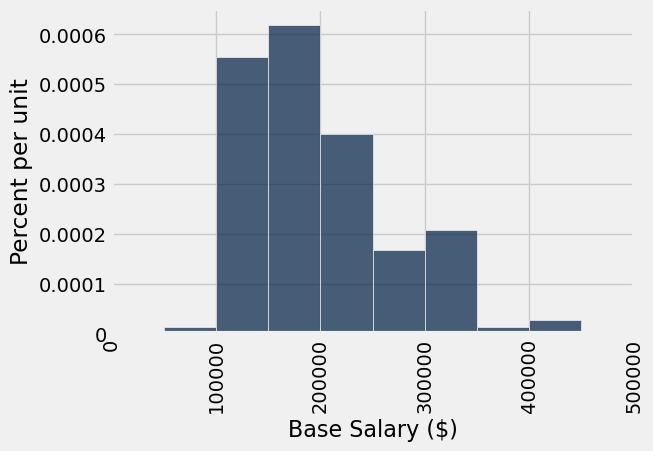

In [105]:
compensation.hist("Base Salary ($)", bins = np.arange(50000, max(compensation.column("Base Salary ($)")),50000))

**Question 4.2.** How many Vice Chancellors made more than $300,000 in base salary? First find the value using code

*Hint:* Use the table method `where` and the property `num_rows`.

<!--
BEGIN QUESTION
name: q42
-->

In [107]:
num_vcs_more_than_300k = compensation.where("Base Salary ($)", are.above(300000)).num_rows
num_vcs_more_than_300k

20

**Question 4.3.** How could you use the histogram to determine how many Vice Chancellors made more than $300,000 in base salary?

<!--
BEGIN QUESTION
name: q43
-->

Look at the bins from 300,000-350,000 onwards, and add up their counts after accounting for price per unit.